# Array arithmetic

pyclesperanto provide several function for arithmetic operations on arrays or between arrays.

In [1]:
import pyclesperanto as cle
import numpy as np

cle.get_device() # default device initialisation

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.216.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Maximum Object Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## operations with scalar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32, mtype=buffer)
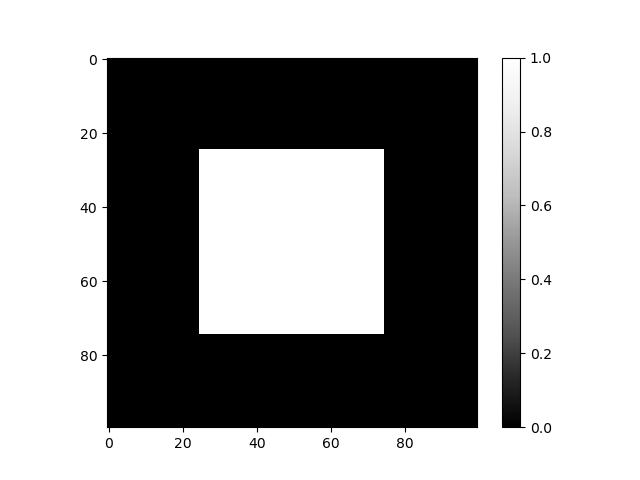
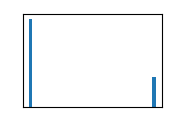

In [5]:
# create an array
arr = np.zeros((100,100))
arr[25:75, 25:75] = 1
# and push it to the device
gpu_arr = cle.push(arr)
gpu_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
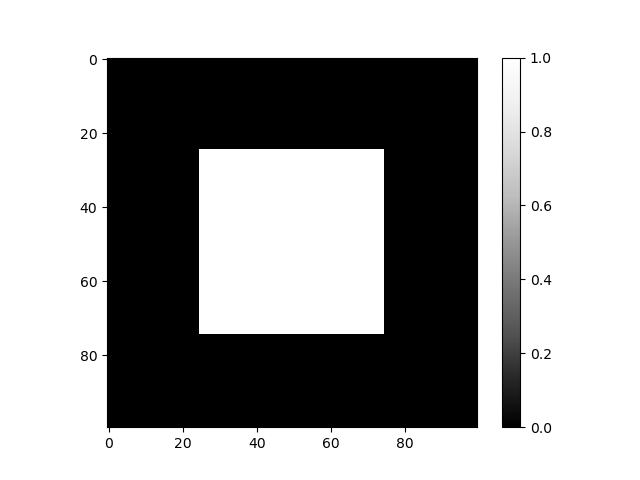
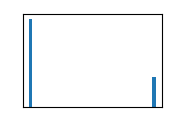

In [6]:
binary_arr = (gpu_arr == 1)
binary_arr

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8, mtype=buffer)
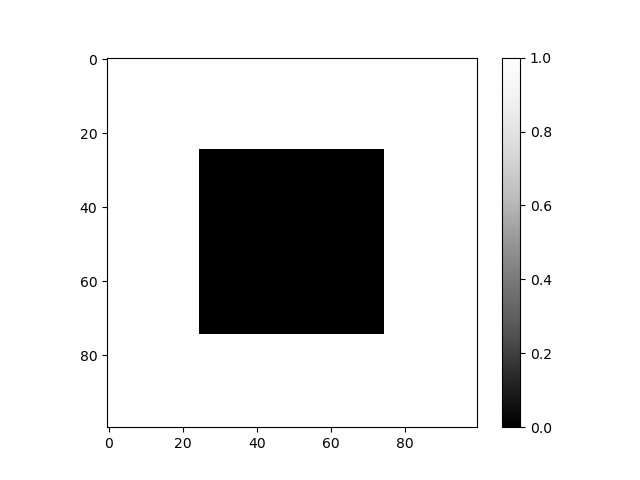
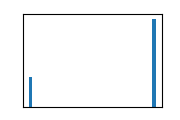

In [7]:
another_binary_image = (binary_arr == 0)
another_binary_image

We are using here the `==` operator which rely on the `equal_constant` function. 
Other functions are available, on which classic arythmetics operator relys on.

Other logical functions are available, with respective operator:
- `array > x` (`cle.greater_constant`)
- `array >= x` (`cle.greater_or_equal_constant`)
- `array < x` (`cle.smaller_constant`)
- `array <= x` (`cle.smaller_or_equal_constant`)

array([[12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       ...,
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8, mtype=buffer)
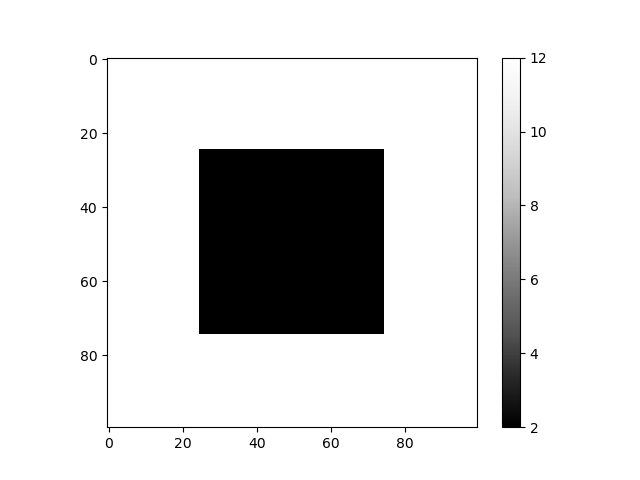
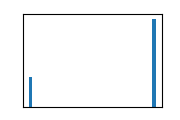

In [11]:
grayscal_image = (another_binary_image * 50 + 10) / 5
grayscal_image

We multiplied each pixel of our image by `50` and then added `10` using the `*` and `+` operator which rely on the `multiply_image_and_scalar` and `add_image_and_scalar` function respectively. Then we divided the result by `5` using the `/` operator (e.g. `divide_scalar_by_image`)

Scalar arythmetic operations:
- `array * x` (`cle.multiply_image_and_scalar`)
- `array / x` (`cle.divide_scalar_by_image`)
- `array + x` (`cle.add_image_and_scalar`)
- `array - x` (`cle.subtract_image_from_scalar`)

## Operation with Array

Similar operations are available between arrays, with the underlying requirement that they have the same dimensions.
Operation are applied pixel wise using the same type of operators.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
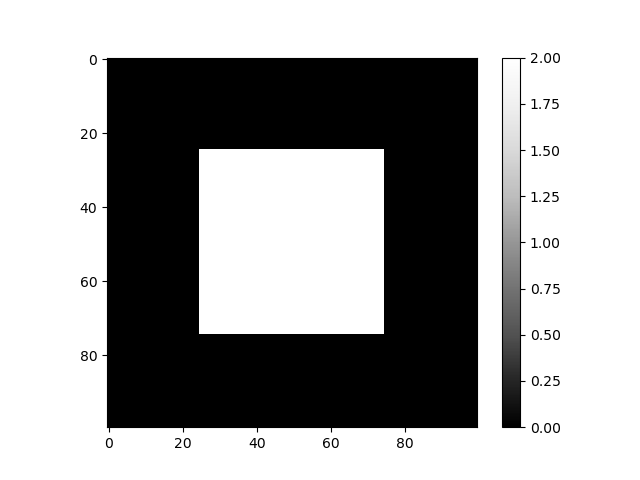
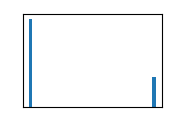

In [12]:
multipled_array = grayscal_image * binary_arr
multipled_array

array([[12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.]], dtype=float32, mtype=buffer)
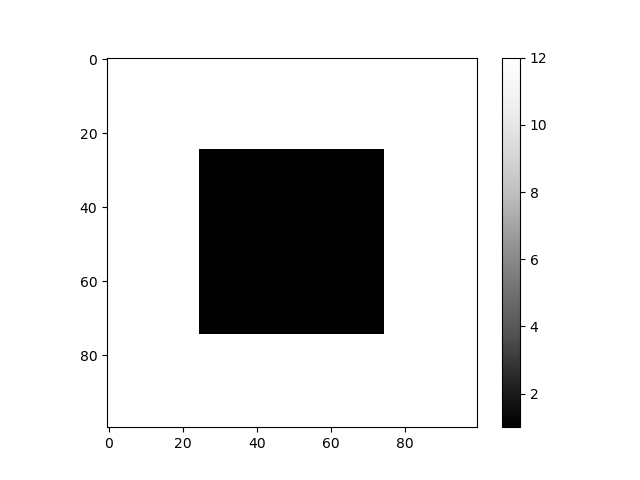
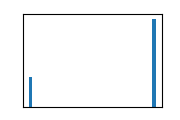

In [14]:
subtracted_array = grayscal_image - binary_arr
subtracted_array

List of array arythmetic operations:
- `arr * array` (`cle.multiply_images`)
- `arr - array` (`cle.subtract_images`)
- `arr / array` (`cle.divide_images`)
- `arr + array` (`cle.add_images`)
- `arr > array` (`cle.greater`)
- `arr >= array` (`cle.greater_or_equal`)
- `arr < array` (`cle.smaller`)
- `arr <= array` (`cle.smaller_or_equal`)
- `arr == array` (`cle.equal`)

### Optimization

For better memory management and speed optimization, it is recommended to rely on function (e.g. `cle.multiply_images`, etc.) instead of operators. Especially if ressources are scarse.